In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout # Dropout:임의의 노드 제거

In [3]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

x_train=x_train.reshape(-1,32,32,3) 
#(데이터 수, 행, 열, 색상 종류), 데이터 수가 -1이면 원래 데이터 개수 그대로 가져옴
# 색상 종류(채널 수):3 이면 컬러(RGB)
x_test=x_test.reshape(-1,32,32,3)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train=x_train.astype(np.float32) /255.0 #0~1 정규화
x_test=x_test.astype(np.float32) /255.0

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [4]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

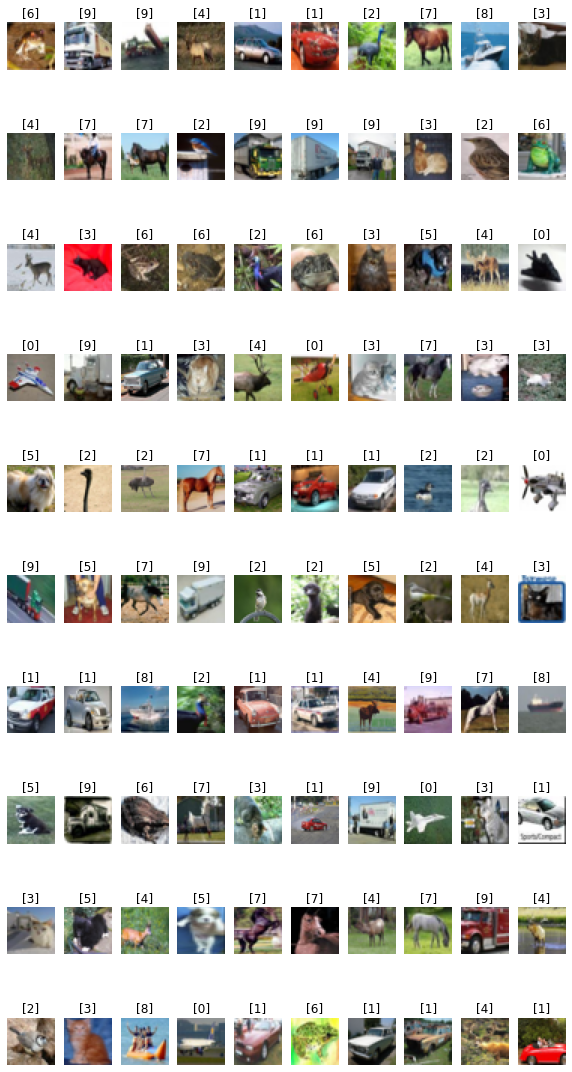

In [6]:
import matplotlib.pyplot as plt

# 100개의 이미지 출력
plt.figure(figsize=(10,20))

for index in range(100):
    plt.subplot(10,10,index+1) #10행 10열
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[index]))
plt.show()

In [13]:
cnn=Sequential()

cnn.add(Conv2D(input_shape=(32,32,3), kernel_size=(3,3), filters=32, activation='relu'))  # kernel_size=filter size
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [14]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               1605760   
                                                      

In [15]:
hist=cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))
# 468.75=60000/128, batch_size:전체 데이터를 batch_size 만큼 나누어 그 결과만큼 진행한 후, w,b 업데이트

Epoch 1/30
391/391 [==============================] - 61s 154ms/step - loss: 1.6342 - accuracy: 0.4047 - val_loss: 1.2488 - val_accuracy: 0.5603
Epoch 2/30
391/391 [==============================] - 63s 162ms/step - loss: 1.3090 - accuracy: 0.5343 - val_loss: 1.1036 - val_accuracy: 0.6195
Epoch 3/30
391/391 [==============================] - 61s 156ms/step - loss: 1.1808 - accuracy: 0.5812 - val_loss: 1.0333 - val_accuracy: 0.6435
Epoch 4/30
391/391 [==============================] - 61s 156ms/step - loss: 1.1005 - accuracy: 0.6113 - val_loss: 0.9753 - val_accuracy: 0.6629
Epoch 5/30
391/391 [==============================] - 61s 155ms/step - loss: 1.0379 - accuracy: 0.6337 - val_loss: 0.9352 - val_accuracy: 0.6728
Epoch 6/30
391/391 [==============================] - 58s 148ms/step - loss: 0.9949 - accuracy: 0.6473 - val_loss: 0.9176 - val_accuracy: 0.6833
Epoch 7/30
391/391 [==============================] - 58s 148ms/step - loss: 0.9488 - accuracy: 0.6648 - val_loss: 0.9077 - val_ac

In [16]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9521 - accuracy: 0.7058


[0.9520735144615173, 0.7057999968528748]

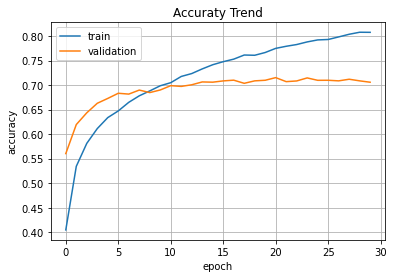

In [17]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuraty Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()

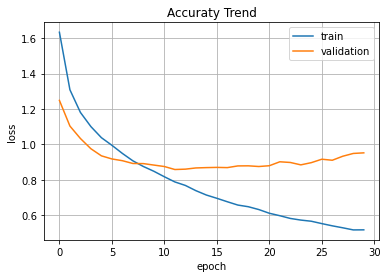

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Accuraty Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()